In [ ]:
# Libs
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pwd = os.getcwd()
dataset = pd.read_csv(pwd + r"\Data\Data - Jadaero Parts Edited.csv")


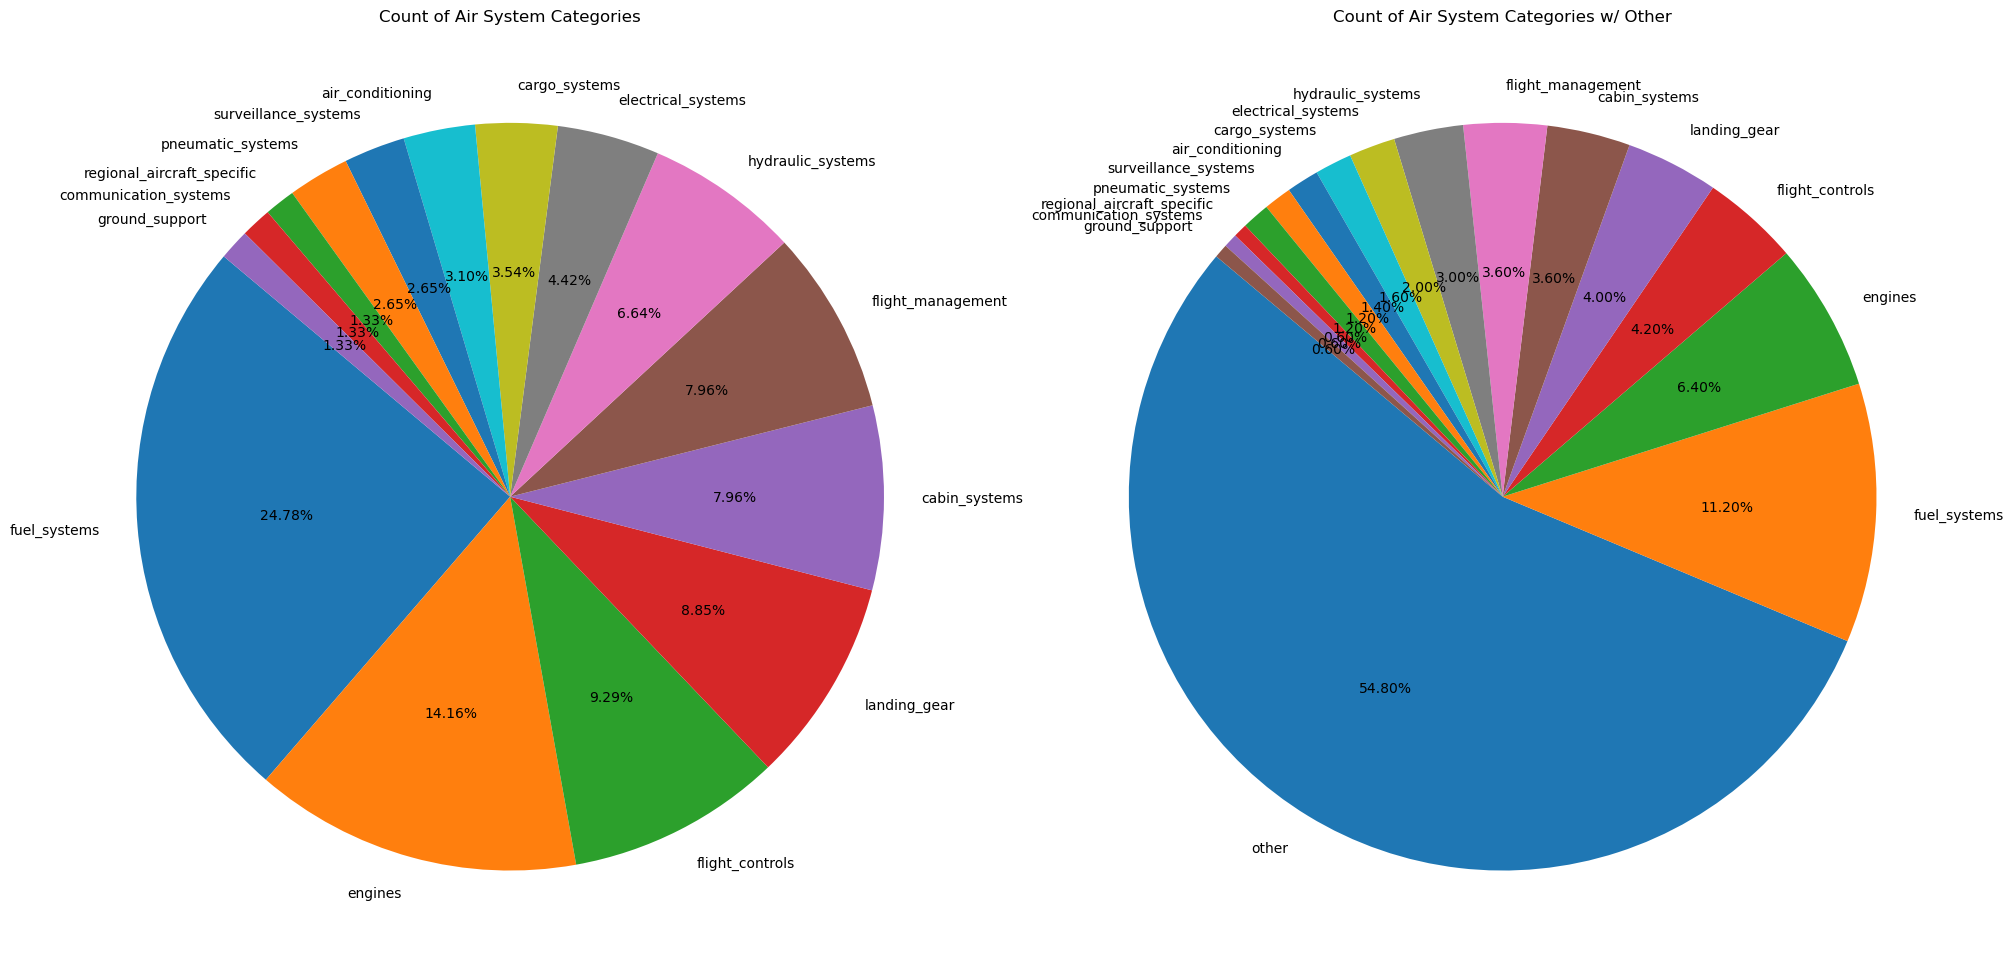

In [ ]:
# PIE CHART

chart = dataset['Air System Category'].value_counts()
chartw = dataset[dataset['Air System Category'] != 'other']['Air System Category'].value_counts()

fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,10)
fig.tight_layout()


chartw.plot(kind='pie', title='Count of Air System Categories',ylabel="", startangle=140 , autopct='%1.2f%%', ax=ax[0])
chart.plot(kind='pie', title='Count of Air System Categories w/ Other',ylabel="", startangle=140 , autopct='%1.2f%%', ax=ax[1])


plt.show()

# VISUALIZE OF THE MOST DAMAGE CATEGORIES

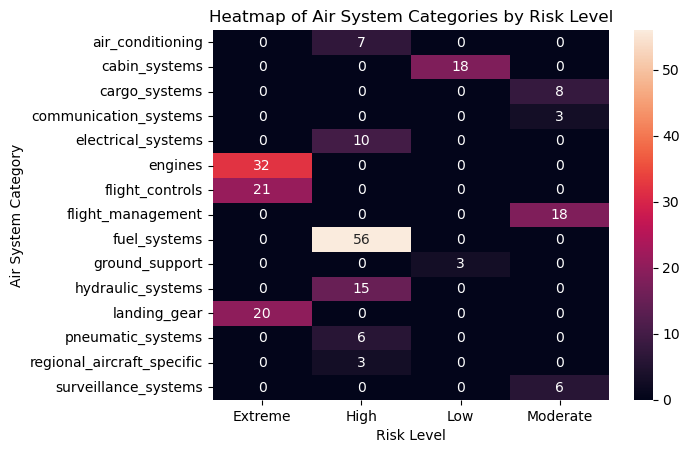

In [ ]:
# HEATMAP CHART


# INSTEAD OF USING VALUES COUNTS USE CROSSTAB  TO COUNT AND COMBINE FOR HEATMAP


filtered_data = dataset[(dataset['Air System Category'] != 'other') & (dataset['Risk Level'] != 'Unknown')]

sns.heatmap(pd.crosstab(filtered_data['Air System Category'], filtered_data['Risk Level']), annot=True, fmt='d')
plt.title('Heatmap of Air System Categories by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Air System Category')
plt.show()
# VISUALIZE OF THE HIGH RISK DAMAGE CATEGORIES

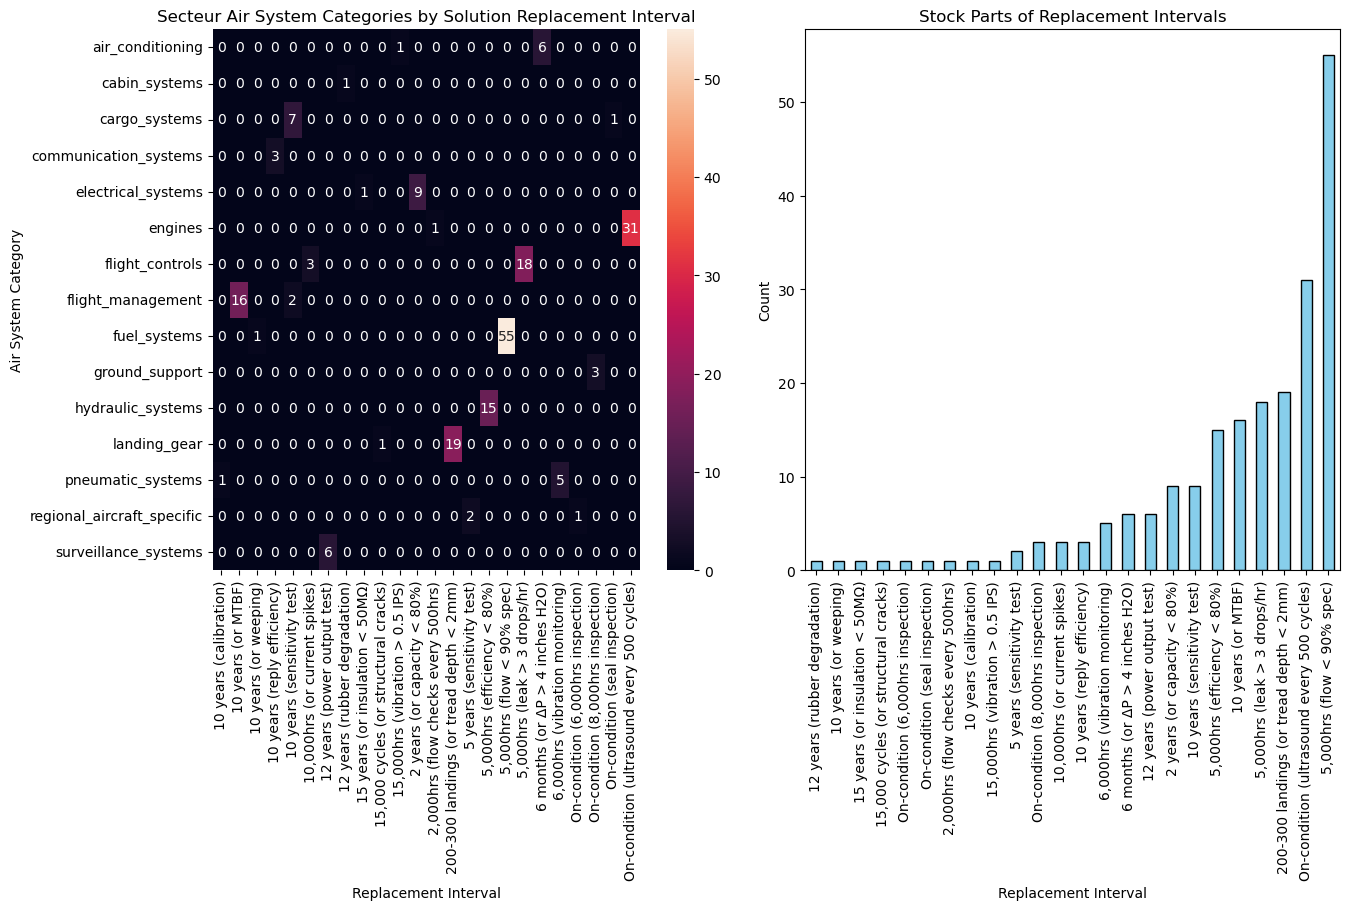

In [ ]:
#HEATMAP CHART AND BAR CHART

chart = dataset[dataset['Replacement Interval'] != 'On-condition']['Replacement Interval'].value_counts()

filtered_data = dataset[(dataset['Air System Category'] != 'other') & (dataset['Replacement Interval'] != 'On-condition')]
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12,6)
fig.tight_layout()
ax[0].set_title('Secteur Air System Categories by Solution Replacement Interval')

sns.heatmap(pd.crosstab(filtered_data['Air System Category'], filtered_data['Replacement Interval']), annot=True, fmt='d', ax=ax[0])
chart[::-1].plot(kind='bar', title='Stock Parts of Replacement Intervals', xlabel="Replacement Interval", ylabel="Count", color='skyblue', edgecolor='black', ax=ax[1])
plt.show()


# VISUALIZE OF THE REPLACEMENT INTERVALS